## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [41]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [42]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [43]:
print("number of rows: {}, number of cloumns: {}".format(df.shape[0], df.shape[1]))

number of rows: 294478, number of cloumns: 5


c. The number of unique users in the dataset.

In [44]:
print("Number of unique users: {}".format(len(df["user_id"].unique())))

Number of unique users: 290584


d. The proportion of users converted.

In [45]:
converted = df.loc[df["converted"] == 1]["user_id"].count() 
users_total = df['user_id'].count()
converted/users_total

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [46]:
#get me treatment group who landed on the old page
condition_one = ((df['group'] == 'treatment') & (df['landing_page'] == 'old_page'))
#get me  control group who landed on new page
condition_two = ((df['group'] == 'control') & (df['landing_page'] == 'new_page'))

#combining these two conditions with an | gets me people where new_page and treatment do not line  up
df.loc[condition_one | condition_two]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


f. Do any of the rows have missing values?

In [47]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<span style="color: red;">

Answer: no
</span>

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [48]:
#here, treatment is not alligned with new page
df.loc[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]

#here, control is not alligned with old page
df.loc[((df['group'] == 'control') & (df['landing_page'] == 'new_page'))]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


we have saved these two filterings in variables conditions_one and condition_two. Let us use these.

In [49]:
print("Shape before dropping rows {}".format(df.shape))
df2 = df.loc[~condition_one]
print("Shape after dropping rows {}".format(df2.shape))

df2 = df2.loc[~condition_two]
print("Shape after dropping rows {}".format(df2.shape))

Shape before dropping rows (294478, 5)
Shape after dropping rows (292513, 5)
Shape after dropping rows (290585, 5)


In [50]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [51]:
print("Number of unique users: {}".format(df2['user_id'].nunique()))

Number of unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [52]:
df2.loc[df2["user_id"].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [53]:
df2.loc[df2["user_id"].duplicated(keep = "last")]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [54]:
print(df2.shape)
df2 = df2.drop_duplicates(subset = ["user_id"], keep ="first")
df2.shape

(290585, 5)


(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [55]:
df2['converted'].loc[df2["converted"] == 1].count()/len(df2)

0.11959708724499628

In [56]:
people_converted = df2['converted'][df2['converted'] == 1].sum() 
total_people = len(df2)

round(people_converted/total_people,4)

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [57]:
people_converted_control = df2['group'][(df2['group'] == 'control') & (df2['converted'] == 1)].count()
people_control = df2['group'][df2['group'] == 'control'].count()

round(people_converted_control/people_control,4)

0.1204

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [58]:
people_converted_treatment = df2['group'][(df2['group'] == 'treatment') & (df2['converted'] == 1)].count()
people_treatment = df2['group'][df2['group'] == 'treatment'].count()

round(people_converted_treatment/people_treatment,4)

0.1188

In [59]:
people_control

145274

d. What is the probability that an individual received the new page?

In [60]:
round(df2['landing_page'].loc[df2['landing_page'] == 'new_page'].count() / total_people,4)

0.5001

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<span style="color: red;">

**Hypothesis stated:**

$H_ {0}: p_{new} - p_{old}$ = 0

$H_ {1}: p_{new} - p_{old}$ != 0

**The above was a two sided test.  We checked whether a sample is greater or less than a range of values. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis. This was not the case, we fail to reject the null hypothesis $H_ {0}$.**


**Conversion rate control group: 0.1204**
**Converstion rate treatment group: 0.1188**

**Hence, the two groups have very similiar converstion rates. Since both groups consist of above >140000 people, the values are representative.**
</span>.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<span style="color: red;">

$H_ {0}: p_{new} - p_{old}$ $\le$ 0

$H_ {1}: p_{new} - p_{old}$ $>$ 0

$\alpha$ = 0.05

</span>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [61]:
round(people_converted/total_people,4)

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [62]:
round(people_converted/total_people,4)

0.1196

In [92]:
people_converted/total_people

0.11959708724499628

c. What is $n_{new}$?

In [63]:
df2['group'][df2['group'] == 'treatment'].count()

145310

d. What is $n_{old}$?

In [64]:
df2['group'][df2['group'] == 'control'].count()

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [65]:
new_page_converted = np.random.choice([0,1], size = (145310, 1) , p =[(1-0.11959708724499628),0.11959708724499628])
new_page_converted.mean()

0.12057669809373064

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [66]:
old_page_converted  = np.random.choice([0,1], size = (145274, 1) , p =[(1-0.11959708724499628),0.11959708724499628])
old_page_converted.mean()

0.11937442350317332

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [67]:
new_page_converted.mean() - old_page_converted.mean()

0.0012022745905573284

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [68]:
n_new = df2['group'][df2['group'] == 'treatment'].count()
p_new = new_page_converted.mean()
n_old = df2['group'][df2['group'] == 'control'].count()
p_old = old_page_converted.mean()

p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Count of p_diffs')

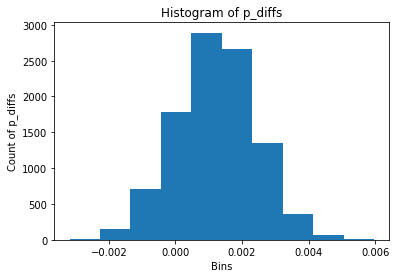

In [69]:
plt.hist(p_diffs)

plt.title("Histogram of p_diffs")
plt.xlabel("Bins")
plt.ylabel("Count of p_diffs")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [70]:
obs_diff = (df2['group'][(df2['group'] == 'treatment') & (df2['converted'] == 1)].count() / df2['group'][df2['group'] == 'treatment'].count() - df2['group'][(df2['group'] == 'control') & (df2['converted'] == 1)].count() / df2['group'][df2['group'] == 'control'].count())
obs_diff

-0.0015782389853555567

In [71]:
(p_diffs > obs_diff).mean()

0.9892

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color: red;">

$ obs\_diff = \frac{people\ treatment\ converted}{people\ treatment} - \frac{people\ control\ converted}{people\ control}$

</span>

<span style="color: red;">

**In part j, I computed the $\alpha$ value, which is the Type 1 error rate. In our study design, we stated that we would reject the null hypothesis if this value were below 0.05. Since $\alpha$ is above 0.05, we fail to reject the null hypothesis. We do not have evidence to suggest that the new landing page converts more users than the old landing page.**

</span>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [72]:
import statsmodels.api as sm

convert_old = df2['group'][(df2['group'] == 'control') & (df2['converted'] == 1)].count()
convert_new = df2['group'][(df2['group'] == 'treatment') & (df2['converted'] == 1)].count()
n_old = df2['group'][df2['group'] == 'control'].count()
n_new = df2['group'][df2['group'] == 'treatment'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [73]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<span style="color: red;">

**The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**

**In other words, the p-value means that given that the null hypothesis is true, there is a 90.5% chance that the conversion rates we collected for the new page are less than or equal to those of the old page. The z-score includes the same information but expresses it in terms of standard deviations.**

**The p-value found using a traditional z-test and the interpretation of that p-value agrees with the findings in parts j and k.**


</span>


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [74]:
df2[['ab_page', 'ab_page_dummy']] = pd.get_dummies(df2['landing_page'])

In [75]:
df2 = df2.drop(['ab_page_dummy'], axis=1)

In [76]:

df2['intercept'] = 1

In [77]:

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [78]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:               8.077e-06
Time:                        11:01:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [79]:
1/np.exp(-0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

In [91]:
df.query("(group == 'treatment' and landing_page == 'old_page')").shape[0]

1965

<span style="color: red;">


**The old page is 1.5% more likely to produce a conversion than the new page. The number is so small that it is not statistically relevant.**

</span>



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color: red;">

**Disadvantages**:

- **A linear relationship may not exist**
- **Correlated errors**
- **Non-constant variance**
- **Outliers**
- **Multicollinearity**
- **adds complexity and is more difficult to interpret**

**It is a good idea to add additional factors if:**


- **a linear correlation is present**
- **the new factor is inpependent of other variables**
- **the variable will improve model performance.**
</span>


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [80]:
countries_df = pd.read_csv('./countries.csv',  usecols= ["user_id", "country"])

In [81]:
print(countries_df.shape)
print(df2.shape)

df3 = pd.merge(df2, countries_df, on='user_id', how='inner')
df3.head()

(290584, 2)
(290584, 7)


,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [82]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])

In [83]:
#check if new colums are there
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1


In [84]:
### Fit Your Linear Model And Obtain the Results
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:               2.323e-05
Time:                        11:01:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

<span style="color: red;">

Since the p-value greater than 0.1 for UK, CA,  it appears like the countries do not have an impact on the conversion.

</span>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [88]:
df3['CA_new'] = df3['ab_page']*df3['CA']
df3['UK_new'] = df3['ab_page']*df3['UK']
df3['US_new'] = df3['ab_page']*df3['US']

In [89]:

df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,CA_new,UK_new,US_new
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1,0,0,0


In [90]:
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK', 'CA_new', 'UK_new', 'US_new']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290577
Method:                           MLE   Df Model:                            6
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:               3.482e-05
Time:                        11:09:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2847
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0193        nan        nan        nan         nan         nan
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_new        -0.0482        nan        nan        nan         nan         nan
UK_new         0.0301        nan        nan        nan         nan         nan
US_new        -0.0013        nan        nan        nan         nan         nan
==============================================================================
"""

When adding these new interaction parameters, we have to keep in the original parameters the interactions are based on. This full model with interactions strongly indicates that these interactions have virtually no effect on predictions. It is in our best interest both in terms of statistical and practical applications to leave these interactions out of the model.

<a id='conclusions'></a>
## Conclusions
<span style="color: red;">

Conclusion [Part I - Probability](#probability)

The proportion of users converted no matter on what page they landed (control vs treatment) was 0.1196.
If we calculate these values for both groups indivually, the conversion rate of the control group is 0.1204. The converstion rate of the treatment group is 0.1188. 
Here, you can already see that the difference is negleccatable (0.0016). First indication that it does not make sense to not implement the new site.


Conclusion [Part II - A/B Test](#ab_test)

In Part II, we performed sampling distribution for the difference in converted individuals between the two pages. We did that for 10.000 iterations,

$n_{new}$ = 145310


$n_{old}$ = 145274

p = 0.11959708724499628

This resulted in a new_page converted ($p_{new}$) = 0.12057669809373064 and old_page_converted ($p_{old}$) = 0.12057669809373064. The difference between these two is 0.0012022745905573284. 
When we simulate  this calulation 10.000 times and  analyze the proportion of p_diffs that are greater then what we actually obsered, the proportion is tiny. Namely = -0.0015782389853555567. Again, it strongly suggests that the new page shall not be implemented.



Conclusion [Part III - Regression](#regression)

In Part III, we saw see that the result we achieved in the previous A/B test can also be acheived by performing regression. We first analysed if the landing page had any influence on the conversion rate. The P>|z| from the column ab_page (dummy column of landing page) turned out to be 0.190. Values ≥ 0.1 indicating insufficient evidence for rejectinig the $H_{0}$.

Then, we added country-information to our Dataframe. The countries did not show any linear correlation with the conversion rate. 

Finally,  we added columns of higher order (CA_new, UK_new, US_new) and correlated them. Again, no correlation with the conversion rate.

We can clearly state that The new_page should not be implemented.

</span>

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.